In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle
import seaborn as sns

In [5]:
df = pd.read_csv("diabetes_data.csv",delimiter=';')
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [6]:
df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

In [7]:
x = df.drop(columns = 'class',axis = 1)
xnew = pd.get_dummies(x, columns=['gender'], drop_first=True)
y = df['class']
xnew

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [8]:
x_train , x_test , y_train,y_test = train_test_split(xnew,y,test_size = 0.2, stratify= y , random_state= 2,shuffle=True)
print("training size",x_train.shape[0])
print("testing size",x_test.shape[0])

training size 416
testing size 104


In [9]:
knn = KNeighborsClassifier(n_neighbors =7)
knn.fit(x_train,y_train)
print(knn.score(x_test, y_test))

#clsf = svm.SVC(kernel='linear')

0.8269230769230769


In [10]:
from sklearn import metrics
scores_List=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores_List.append(metrics.accuracy_score(y_test,y_pred))


#clsf.fit(x_train,y_train)

In [11]:
print(scores_List)

[0.9519230769230769, 0.9134615384615384, 0.9230769230769231, 0.8557692307692307, 0.875, 0.8653846153846154, 0.8269230769230769, 0.7884615384615384, 0.7884615384615384, 0.7884615384615384, 0.7884615384615384, 0.8076923076923077, 0.8076923076923077, 0.8173076923076923, 0.8365384615384616, 0.7980769230769231, 0.7980769230769231, 0.7788461538461539, 0.7788461538461539]


Text(0, 0.5, 'accuracy')

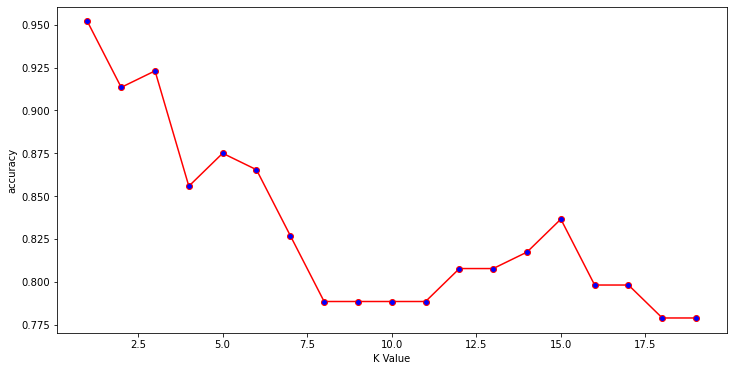

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20),scores_List, color='red',marker='o', markerfacecolor='blue')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50), 'weights': ('uniform', 'distance'),'metric': ('minkowski', 'chebyshev')}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}

In [14]:
knn = KNeighborsClassifier(n_neighbors =3 , weights= 'distance' , metric ='minkowski' )
knn.fit(x_train,y_train)
y_predicted=knn.predict(x_test)
print(knn.score(x_test, y_test)*100)

99.03846153846155


In [15]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors =3 , weights= 'distance' , metric ='minkowski')
cv_scores = cross_val_score(knn_cv, xnew, y, cv=3) # training 3 times
print(cv_scores)
print(np.mean(cv_scores))

[0.90229885 0.88439306 0.97109827]
0.9192633933514939


In [16]:
probs=knn.predict_proba(x_test)
probs.shape

(104, 2)

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(np.array(y_test).reshape(-1,1), probs[:, 1])
print(fpr)
print(tpr)
print(thresholds)

[0.    0.    0.    0.    0.    0.025 0.025 0.125 1.   ]
[0.       0.875    0.9375   0.953125 0.984375 0.984375 1.       1.
 1.      ]
[2.         1.         0.66666667 0.66666667 0.64611063 0.39228096
 0.35388937 0.29289322 0.        ]


(0.0, 1.0)

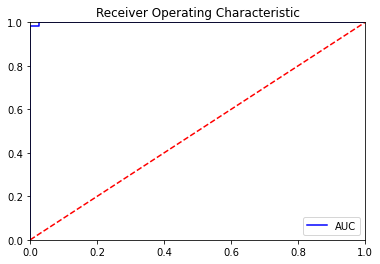

In [18]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [19]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.7687


In [20]:
df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[29 11]
 [12 52]]


In [22]:
import pickle


In [23]:
filename = 'trained_model.sav'
pickle.dump(knn , open(filename,'wb'))